In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [2]:
# read csv and preview
df = pd.read_csv('Concrete_Data.csv')
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age_days                                               1030 non-null   int64  
 8   Concrete compressive strength_Mpa                

(None,
        Cement (component 1)(kg in a m^3 mixture)  \
 count                                1030.000000   
 mean                                  281.167864   
 std                                   104.506364   
 min                                   102.000000   
 25%                                   192.375000   
 50%                                   272.900000   
 75%                                   350.000000   
 max                                   540.000000   
 
        Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
 count                                        1030.000000       
 mean                                           73.895825       
 std                                            86.279342       
 min                                             0.000000       
 25%                                             0.000000       
 50%                                            22.000000       
 75%                                           142.950000  

In [3]:
# rename comlumns
column_names = ['Cement','Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive Strength']
df.columns = column_names
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
# create data and labels for model
X = df.drop(columns='Concrete Compressive Strength').to_numpy()
y = df['Concrete Compressive Strength'].to_numpy()
print(f"Data: {X.shape}\n{X}\nLabels: {y.shape}\n{y}")

Data: (1030, 8)
[[ 540.     0.     0.  ... 1040.   676.    28. ]
 [ 540.     0.     0.  ... 1055.   676.    28. ]
 [ 332.5  142.5    0.  ...  932.   594.   270. ]
 ...
 [ 148.5  139.4  108.6 ...  892.4  780.    28. ]
 [ 159.1  186.7    0.  ...  989.6  788.9   28. ]
 [ 260.9  100.5   78.3 ...  864.5  761.5   28. ]]
Labels: (1030,)
[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]


In [5]:
# create test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"X-train shape: {X_train.shape}\nX-test shape: {X_test.shape}\ny-train shape: {y_train.shape}\ny-test shape: {y_test.shape}")

X-train shape: (824, 8)
X-test shape: (206, 8)
y-train shape: (824,)
y-test shape: (206,)


In [6]:
# scale data
scaley_boi = StandardScaler()
X_train = scaley_boi.fit_transform(X_train)
X_test = scaley_boi.fit_transform(X_test)
X_scaled = scaley_boi.fit_transform(X)
print(f"Scaled Data: {X_train.shape}{X_train}\n{X_test.shape}{X_test}")

Scaled Data: (824, 8)[[-1.16087734  0.85738747  0.9824489  ... -0.25746155 -0.64752011
  -0.27567315]
 [ 1.30862304 -0.60249189  1.23259821 ... -1.92694961 -0.2731482
  -0.27567315]
 [-0.0768653  -0.85558366  1.06687429 ...  1.01785948  0.06662828
  -0.68931339]
 ...
 [-0.86591441 -0.85558366  1.12628475 ...  1.34082214  0.33103616
   0.91561074]
 [ 1.78316909  0.51111191 -0.83113361 ... -1.54422615  0.11605031
  -0.27567315]
 [ 0.28509237 -0.85558366  0.9355459  ... -0.6172979   0.13458358
  -0.27567315]]
(206, 8)[[-0.07038256  0.50366328 -0.91352378 ... -0.52017165 -1.42957365
   4.33092738]
 [ 0.99259918  1.40290609 -0.91352378 ... -0.34813789 -0.30913641
  -0.58597763]
 [ 1.29300707  1.40290609 -0.91352378 ... -0.34813789 -0.30913641
  -0.29755583]
 ...
 [ 0.15299766  1.54558594 -0.91352378 ...  0.46326545  0.31637575
  -0.58597763]
 [ 1.66824182 -0.5994079   1.15488362 ... -2.01022787 -0.38487692
   0.08700658]
 [ 0.73290592 -0.86318579 -0.91352378 ... -0.03251689  0.01994306
   0

In [9]:
# linear regression and RMSE
linny_reggie = LinearRegression()
linny_reggie.fit(X_train,y_train)
train_pred = linny_reggie.predict(X_train)
test_pred = linny_reggie.predict(X_test)
RMSE_train = np.sqrt(mean_squared_error(train_pred,y_train))
RMSE_test = np.sqrt(mean_squared_error(test_pred,y_test))
print(f"Train RMSE: {RMSE_train}\nTest RMSE: {RMSE_test}")

Train RMSE: 10.518787334819802
Test RMSE: 9.908779663955189


In [10]:
# PCA with 7 components
pca_boi = PCA(n_components=7,random_state=33)
principal_comps = pca_boi.fit_transform(X_scaled)
print(f"Principal Components Shape: {principal_comps.shape}")

Principal Components Shape: (1030, 7)


In [11]:
# pca with all components for plot
pca_each_and_every = PCA(n_components=8,random_state=33)
prin_comp_eae = pca_each_and_every.fit_transform(X_scaled)

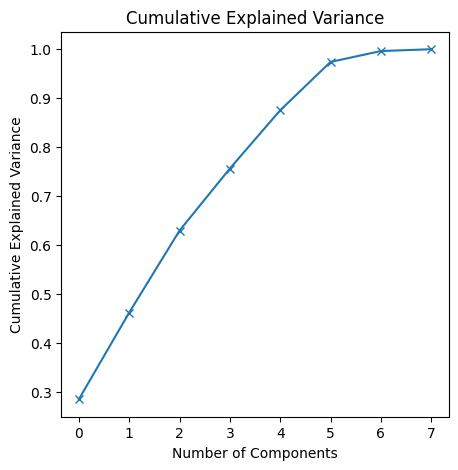

In [14]:
# cumulative explained variance chart
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca_each_and_every.explained_variance_ratio_),marker='x')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [15]:
# pca with 5 components
pca_5 = PCA(n_components=5,random_state=33)
prin_comp_5 = pca_5.fit_transform(X_scaled)

In [16]:
# data for other lin reg
X_train2, X_test2, y_train2, y_test2 = train_test_split(prin_comp_5,y,test_size=0.2,random_state=42)

In [17]:
# linear regression and RMSE
linny_reggie2 = LinearRegression()
linny_reggie2.fit(X_train2,y_train2)
train_pred2 = linny_reggie2.predict(X_train2)
test_pred2 = linny_reggie2.predict(X_test2)
RMSE_train2 = np.sqrt(mean_squared_error(train_pred2,y_train2))
RMSE_test2 = np.sqrt(mean_squared_error(test_pred2,y_test2))
print(f"Train RMSE: {RMSE_train2}\nTest RMSE: {RMSE_test2}")

Train RMSE: 12.644621230527768
Test RMSE: 11.955881641469228


In [18]:
# difference
trd = np.abs((RMSE_train-RMSE_train2))/((RMSE_train+RMSE_train2)/2)
ted = np.abs((RMSE_test-RMSE_test2))/((RMSE_test+RMSE_test2)/2)
print(f"Train RMSE Difference: {trd}\nTest RMSE Difference: {ted}")

Train RMSE Difference: 0.1835510425601361
Test RMSE Difference: 0.18725210959532881
